In [11]:
import numpy as np
import matplotlib.pyplot as plt

import SSN_classes

# Reduced 2D SSN vs Homog Ring SSN
Ahmadian et al. 2013 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4026108/)

### 1. Homog Ring SSN
[x] the input vector serves as 'Step input' at t=0! instead of impulse input  
[x] The plot from fixed_point is firing rate vs time (dt=1 (ms?))  
[ ] __Why not use Leapfrog Method? more accurate than Euler__  
[ ] Although there is a function called make_noise_cov, it's not used for now.  
[x] __SSNUniform__ requires all elements of __J__ to be non-negative, while __SSNHomogRing__ requires two elements >0, two < 0?  
[ ] __What is the formula to cunstruct a stimulu with two orthogonal gratings?__  
[ ] HomogRing how to set gE/gI? sum of square = 1?  | How to find c and g for two stimulus?
[ ] J_2x2 = np.array([[2.5, -1.3],  [2.4, -1.0]]) * np.pi  # Why there is a pi?  
[ ] When calculating phi, set gE, gI, c = 1? 


J_2x2: [[2.5 1.3]
 [2.4 1. ]]
      converged to fixed point at iter=246,      as max(abs(dx./max(xvec,1.0))) < 1e-05 
(248, 4)


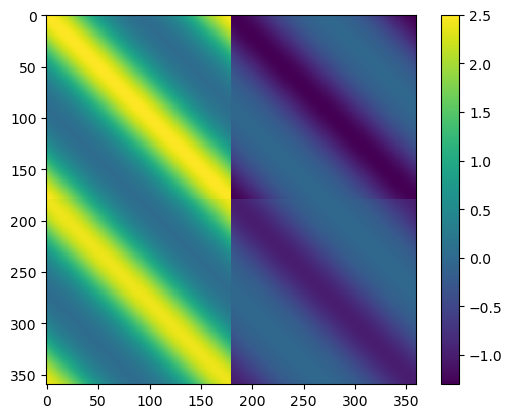

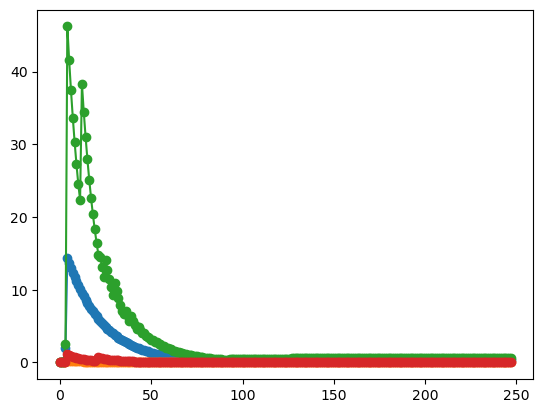

In [12]:
M = 180  # number of neurons in E or I populations (2013 paper had M = 180, but lower (but not too much low) is also fine, and wouldn't really affect anything)
L = 180  # length of the ring (180 degrees)

J_2x2 = np.array([[2.5, 1.3],
                  [2.4, 1.0]])
s_2x2 = np.ones((2,2)) * 32 # in degrees, orientation tuning width of recurrent connections

# make SSN object
ssn = SSN_classes.SSNHomogRing(n=2, k=0.04, tauE=20, tauI=10, 
                               J_2x2=J_2x2, s_2x2=s_2x2, Ne=M, L=L, L1normalize=False)

plt.figure()
print('J_2x2:', J_2x2)
plt.imshow(ssn.W, cmap='viridis', interpolation='nearest')        
plt.colorbar()

# make external input vector corresponding to a grating stimulus
contrast = 20
orientation = 0

ring_input = ssn.make_grating_input(ori_s=orientation,
                                sig_EF=30,  # in degrees, orientation tuning width of external input 
                                gE=1,
                                gI=0,
                                contrast=contrast)

# find fixed point firing rates
rates, convg = ssn.fixed_point_r(ring_input, Tmax = 500, verbose=True, PLOT=True, inds=[0, int(0.5*M), M, M+int(0.5*M)]) #Print angle=0, 90 for E and I

# To check signs of weight matrix
# plt.imshow(ssn.W, cmap='viridis', interpolation='nearest')
# plt.colorbar()


### 2. Equivelant 2D SSN  
Please help me check my calculation for the factor phi (to find equivlant 2D model)

[1.         0.99951184 0.99804878 0.99561511 0.99221794 0.98786717
 0.98257547 0.97635817 0.96923323 0.96122114 0.9523448  0.94262944
 0.93210249 0.92079345 0.90873376 0.89595662 0.8824969  0.86839093
 0.85367636 0.83839198 0.82257756 0.80627369 0.78952157 0.77236288
 0.7548396  0.73699381 0.71886757 0.70050272 0.68194075 0.66322264
 0.64438872 0.62547853 0.60653066 0.5875827  0.56867105 0.54983088
 0.53109599 0.51249874 0.49406997 0.47583897 0.45783336 0.44007911
 0.42260044 0.40541987 0.38855813 0.37203419 0.35586525 0.34006678
 0.32465247 0.30963432 0.29502266 0.28082614 0.26705184 0.25370527
 0.24079047 0.22831003 0.21626517 0.20465579 0.19348058 0.18273705
 0.17242162 0.1625297  0.15305574 0.14399333 0.13533528 0.12707367
 0.11919993 0.11170492 0.104579   0.0978121  0.09139376 0.08531323
 0.07955951 0.07412142 0.06898763 0.06414674 0.05958732 0.05529795
 0.05126725 0.04748396 0.04393693 0.04061518 0.03750792 0.03460457
 0.03189479 0.02936852 0.02701594 0.02482756 0.02279418 0.0209

<Figure size 640x480 with 0 Axes>

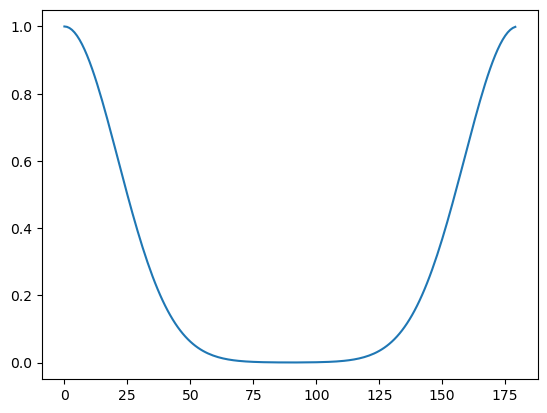

<Figure size 640x480 with 0 Axes>

In [13]:
# Phi = 0.774

# find Phi
ssn = SSN_classes.SSNHomogRing(n=2, k=0.04, tauE=20, tauI=10, 
                               J_2x2=J_2x2, s_2x2=s_2x2, Ne=M, L=L, L1normalize=False)
weight_0 = ssn.W[:,0] # The first column

nomalized_weight_0 = weight_0/weight_0[0] * 1/M
input_g = ssn.make_grating_input(ori_s=orientation,
                                sig_EF=30,  # in degrees, orientation tuning width of external input 
                                gE=1,
                                gI=0,
                                contrast=1)
# print(nomalized_weight_0[0] / (L/M)) # should = 1

distsq = lambda x: np.minimum(np.abs(x), L-np.abs(x))**2
nomalized_weight_0 = np.exp(-distsq(ssn.ori_vec_E)/2/32**2)
print(nomalized_weight_0)
# from util import Euler2fixedpt, toeplitz
# plt.plot( toeplitz(np.exp(-distsq(ssn.ori_vec_E)/2/32**2) * L / M)[:,0] )

plt.plot(input_g[0:M]**ssn.n)
# Calculate Phi
Phi = np.sum( input_g[0:M]**ssn.n * nomalized_weight_0[0:M] )

print(Phi)


plt.figure()


J_2x2: [[2.5 1.3]
 [2.4 1. ]]
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-05 
(203, 2)
[0.04517063 0.03701633]


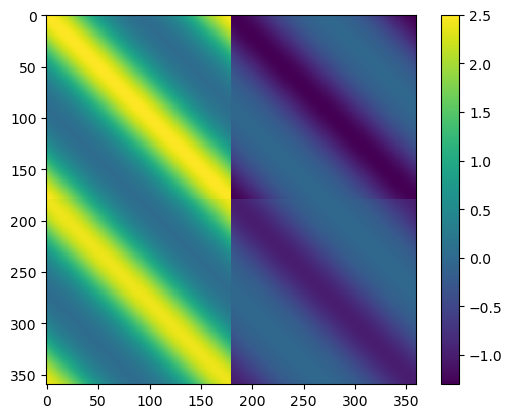

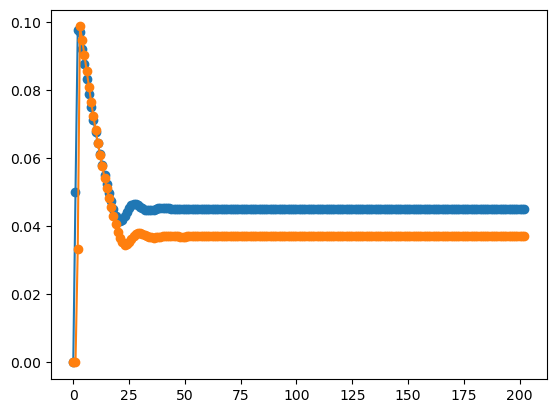

In [14]:
ssn_2d = SSN_classes.SSN_2D(n=2, k=0.04, tauE=20, tauI=10, Jee = [0][0]*Phi, Jei = J_2x2[1][0]*Phi, Jie=J_2x2[0][1]*Phi, Jii=J_2x2[1][1]*Phi)

plt.figure()
print('J_2x2:', J_2x2)
plt.imshow(ssn.W, cmap='viridis', interpolation='nearest')        
plt.colorbar()

input = np.array([1,0]) * contrast



# find fixed point firing rates
rates, convg = ssn_2d.fixed_point_r(input, Tmax = 500, verbose=True, PLOT=True, inds=[0,1])
print(rates)
# plt.plot(rates)
# plt.yscale('log')  # Set x-axis to logarithmic scale

# To check signs of weight matrix
# plt.imshow(ssn_2d.W, cmap='viridis', interpolation='nearest')
# plt.colorbar()


# Retinotopic-map SSN of Holt, Miller, and Ahmadian, 2023
https://www.biorxiv.org/content/10.1101/2023.05.11.540442v1.abstract

This is (almost) the SSN in Fig. 4 of the above paper.
(Note, however, here I construct the single-synaptic-receptor-type SSN; to get the version of the model in the paper you have to use `SSN_classes.SSN2DTopoV1_AMPAGABA` and specify other parameters, including `ssn.tau_s`.)

In [15]:
from dataclasses import dataclass

@dataclass
class GridPars:
    gridsize_Nx: int # number of grid-points across each edge of the 2D retinotopic grid
    gridsize_deg: float # edge length in degrees of visual angle
    magnif_factor: float # cortical magnification factor in mm/deg
    hyper_col: float # hypercolumn size (i.e. period of orientation map) in mm 

(203, 1)


-0.0

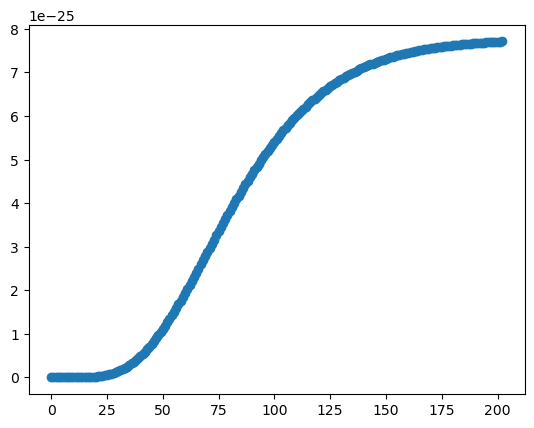

In [16]:
grid_pars = GridPars(**{'gridsize_Nx': 17,
                        'gridsize_deg': 3.2,
                        'hyper_col': 800,   # if you actually want to get an orientation map, a reasonable choice would be 0.8 to 1.0 mm
                        'magnif_factor': 2})

psi = 0.774
conn_pars = dict(J_2x2= np.array([[1.495, -1.034],
                                  [1.110, -0.517]]) * np.pi * psi,
                 s_2x2= np.array([[0.2654, 0.09],
                                  [0.2940, 0.09]]), # in mm
                 p_local= [0., 0.],
                 sigma_oris= 45,
                 PERIODIC= False,
                 CellWiseNormalized=True)

# make SSN object
ssn = SSN_classes.SSN2DTopoV1(n=2,
                              k=0.04,
                              tauE=20,
                              tauI=10, 
                              grid_pars=grid_pars,
                              conn_pars=conn_pars)

# make feedforward input vector for a grating stimulus
contrasts = 50
radius = 0.75
orientation = 0


input_pars = {'gE' : 0.476,
              'gI' : 0.232,
             'sig_ori_EF': 32,
             'sig_ori_IF': 32,
             'sigma_RF': 0.04}
             

input = contrast * ssn.make_grating_input(radius, ori_s=orientation,
                                          **input_pars)

# find fixed point firing rates
rates, convg = ssn.fixed_point_r(input, verbose=False, PLOT=True)

# plt.imshow(ssn.W, cmap='viridis', interpolation='nearest')
# plt.colorbar()

ssn.W[200,300]

For Fig. 6 of the above paper, replace the following according to:

In [17]:
conn_pars = dict(J_2x2= np.array([[1.495, -1.034],
                                  [1.110, -0.517]]) * np.pi * psi,
                 s_2x2= np.array([[0.2654, 0.09],
                                  [0.2940, 0.09]]), # in mm
                 p_local= [0., 0.],
                 sigma_oris= 45,
                 PERIODIC= False,
                 CellWiseNormalized=True)

input_pars = {'gE' : 0.476,
              'gI' : 0.232,
             'sig_ori_EF': 32,
             'sig_ori_IF': 32,
             'sigma_RF': 0.04}